In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine = pd.read_csv('winemag-data-130k-v2.csv')

In [3]:
wine.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


# Data Cleaning

In [4]:
#check for missing values:
wine.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

We can see that the data seems to have a lot of missing values.

In [5]:
#check for duplicates:
duplicates = wine[wine.duplicated('description',keep=False)].sort_values('description')

In [6]:
duplicates.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
67614,67614,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
46540,46540,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
119702,119702,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
72181,72181,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
73731,73731,France,"87-89 Barrel sample. A pleasurable, perfumed w...",Barrel sample,88,NaN,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Lalande-Borie 2008 Barrel sample (Sai...,Bordeaux-style Red Blend,Château Lalande-Borie


In [7]:
print('Number of duplicates:',len(duplicates))

Number of duplicates: 20026


Since there are a lot of duplicates in the data, we would have to remove all of them.

In [8]:
wine2 = wine.drop_duplicates('description')

In [9]:
len(wine2)

119955

In [10]:
#check for missing values in wine2:
wine2.isnull().sum()

Unnamed: 0                   0
country                     59
description                  0
designation              34532
points                       0
price                     8388
province                    59
region_1                 19558
region_2                 73195
taster_name              24912
taster_twitter_handle    29441
title                        0
variety                      1
winery                       0
dtype: int64

# Handling Missing Values and Exploratory Data Analysis

Country: 
For missing countries, I would replace them with unknown to prevent any misunderstanding.

Price:
Since some wine have missing values, I would evaluate several factors that might have some relationship with price and fill in missing prices based on information on other prices.

Region1:
For region1 that are missing, I would change it to unknown.

Region2:
Since about half of our data are missing for region2, we would exclude the column region2 from our analysis.

Taster name:
We would exclude this from our analysis since we do not really want to know how accurate a taster is, but rather based on the wine's description, what is the wine variety. 

Taster tweeter handle:
This is also irrelevant to our analysis so we would not be including this column in our analysis.

Variety: Since there is only 1 row that has missing variety, we will just drop it




In [11]:
wine2['country'].fillna('unknown',inplace= True)

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [12]:
 #Price of wine in different countries:
price_and_country = wine2.groupby('country')['price'].mean().reset_index()
price_and_country.sort_values(by=['price'],ascending=False,inplace=True)

In [13]:
price_and_country

,country,price
38,Switzerland,72.833333
14,England,52.677966
17,Germany,43.460789
19,Hungary,42.234375
15,France,41.994105
22,Italy,39.928027
40,US,36.697346
7,Canada,35.776786
2,Australia,35.686491
21,Israel,31.770419


Since Egypt does not seem to have any prices regarding the wines they produce, I would not be able to fill in any prices for Egypt. Thus, filling missing prices based on each country's average price might not be the best method here. 

In [14]:
#Price Distribution:
price_points = wine2[pd.notnull(wine2['price'])][['price','points']]
price_points['log_price'] = np.log(price_points['price'])
price_points.head(2)

,price,points,log_price
1,15.0,87,2.708050
2,14.0,87,2.639057


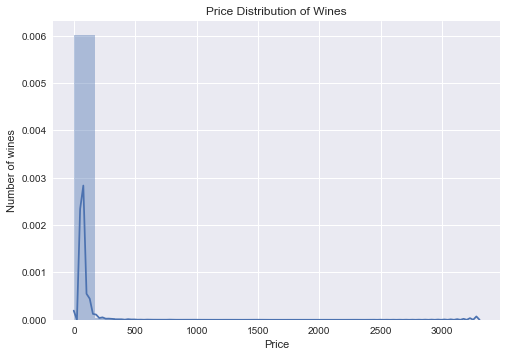

In [15]:
sns.distplot(price_points['price'],bins=20)
plt.xlabel('Price')
plt.ylabel('Number of wines')
plt.title('Price Distribution of Wines')
plt.show()

We can see that the price distribution is right-skewed and this is not a surprise because in general price has no limit and thus the distribution of price could have a pretty large range. Thus, it would be better if I transform this variable to log(price) to make the price distribution more normal.

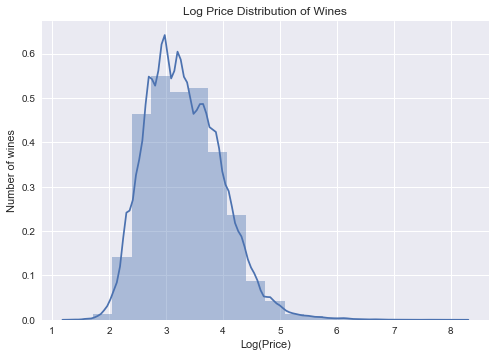

In [16]:
sns.distplot(price_points['log_price'],bins=20)
plt.xlabel('Log(Price)')
plt.ylabel('Number of wines')
plt.title('Log Price Distribution of Wines')
plt.show()

The distribution of wine price is now more normal, with a peak of 3 and 3.5. I would like to now figure out if Log(price) has a correlation with the quality of wine (based on number of points the wine has).

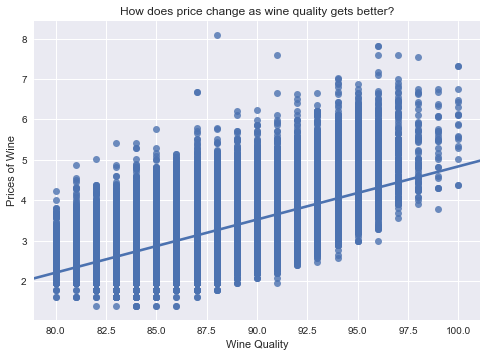

In [17]:
sns.regplot(x='points',y='log_price',data=price_points,scatter=True,fit_reg=True)
plt.xlabel('Wine Quality')
plt.ylabel('Prices of Wine')
plt.title('How does price change as wine quality gets better?')
plt.show()

Turns out that there is a linear relationship between price of wine and wine quality. As wine quality increases, the price of wine also increases. Thus, using points to predict the prices of wine would be useful here.

In [18]:
#fill in missing prices of wine with points linear regression formula:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = price_points['points'].reshape((111567,1))
y = price_points['log_price'].reshape((111567,1))
lm.fit(X,y)
print('intercept:',lm.intercept_)
print('Coefficient:',lm.coef_)

for idx,row in wine2.iterrows():
    if pd.isnull(row['price']):
        wine2['price'][idx] = np.exp(lm.intercept_ + (lm.coef_*row['points']))


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


intercept: [-8.30436854]
Coefficient: [[ 0.13144119]]


/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
wine2.isnull().sum()

Unnamed: 0                   0
country                      0
description                  0
designation              34532
points                       0
price                        0
province                    59
region_1                 19558
region_2                 73195
taster_name              24912
taster_twitter_handle    29441
title                        0
variety                      1
winery                       0
dtype: int64

In [20]:
#Let's fill in the missing values for Region1:
wine2['region_1'] = wine2['region_1'].fillna('unknown')
wine2['province'] = wine2['province'].fillna('unknown')

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
df = wine2[pd.notnull(wine2['variety'])]
df = df.drop(['designation','region_2','taster_name','taster_twitter_handle'],axis=1)
df['log_price'] = np.log(df['price'])

In [22]:
df.isnull().sum()

Unnamed: 0     0
country        0
description    0
points         0
price          0
province       0
region_1       0
title          0
variety        0
winery         0
log_price      0
dtype: int64

Since we would not be using designation, province,region_2, taster_name, and taster_twitter_handle as part of our analysis, as we are mainly considering the wine's description as part of the wine variety's prediction, we now have no missing values.

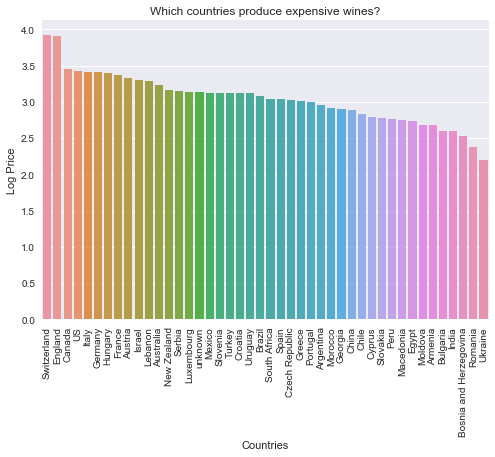

In [23]:
#Average Price variation across countries:
country_prices = df.groupby('country')['log_price'].mean().reset_index()
country_prices = country_prices.sort_values('log_price',ascending=False)
sns.barplot(x='country',y='log_price',data=country_prices)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Log Price')
plt.title('Which countries produce expensive wines?')
plt.show()

Based on mean prices, we can see that Switzerland produce the most expensive wines among other countries, followed by England, Canada, and US.

The cheapest wine producing countries are Ukraine, ROmania, Bosnia, and India.

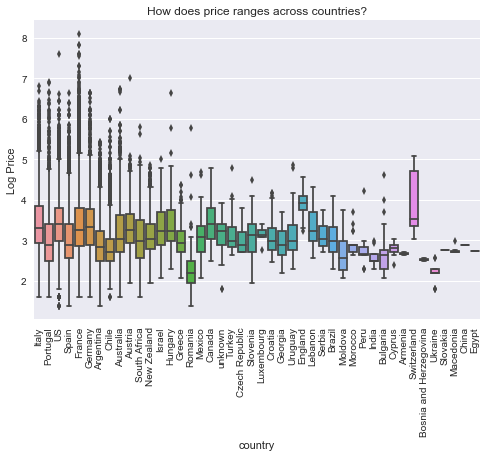

In [24]:
#LogPrice Ranges across countries:
sns.boxplot(x='country',y='log_price',data=df)
plt.xlabel('country')
plt.xticks(rotation=90)
plt.ylabel('Log Price')
plt.title('How does price ranges across countries?')
plt.show()

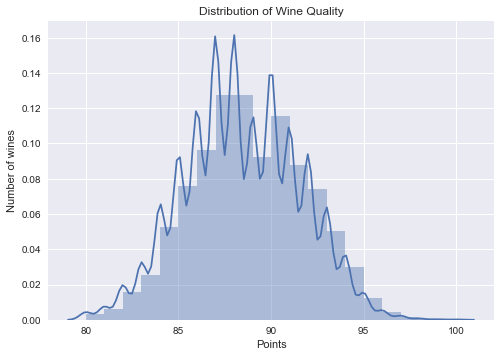

In [25]:
#points distribution:
sns.distplot(price_points['points'],bins=20)
plt.xlabel('Points')
plt.ylabel('Number of wines')
plt.title('Distribution of Wine Quality')
plt.show()

We can see that the wines here have a minimum score of 80. According to a sommelier, a score of 80 indicates that a wine is of good enough quality to get a review. However, if the benchmark is 90, which countries produce really high quality wines?

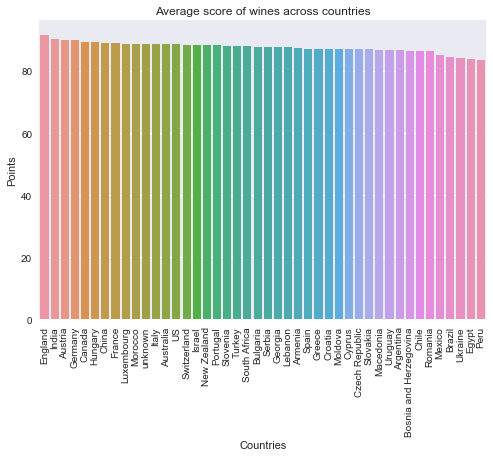

In [26]:
#Wine quality across countries:
points_country = df.groupby('country')['points'].mean().reset_index()
points_country = points_country.sort_values('points',ascending=False)
sns.barplot(x='country',y='points',data=points_country)
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.ylabel('Points')
plt.title('Average score of wines across countries')
plt.show()

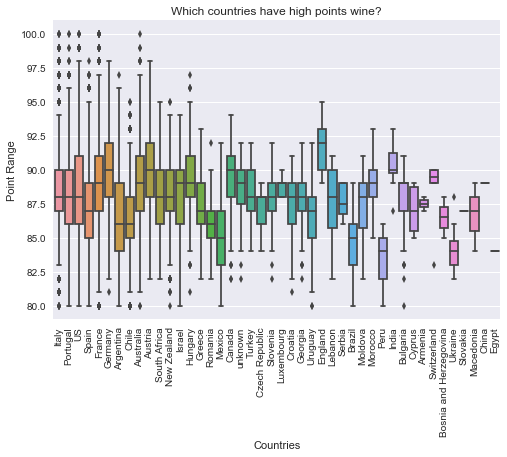

In [27]:
#Figure out the points of wine across different countries:
sns.boxplot(x='country',y='points',data=df)
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.ylabel('Point Range')
plt.title('Which countries have high points wine?')
plt.show()

 - sort from highest to lowest

England's wines seem to have higher points in comparison to other countries and India as well. What is interesting here is India's wines do not seem to be on the high-end of the price range but England's wines seem to be on the high-end of the price range. This might mean that Price is not correlated with points. I will evaluate this further below.

In [28]:
#Best wine producing countries based on counts (point system):
wine_count = pd.DataFrame()
wine_count['Total Number of Wines'] = df.groupby('country')['points'].count()
good_wine = df.points >=90
good_wine2 = df[good_wine]
wine_count['Number of High Quality Wines'] = good_wine2.groupby('country')['points'].count()
wine_count.fillna(0,inplace=True)
wine_count['Proportion of High Quality wines'] = wine_count['Number of High Quality Wines']/wine_count['Total Number of Wines']
wine_count.reset_index(inplace=True)
wine_count.head(2)

,country,Total Number of Wines,Number of High Quality Wines,Proportion of High Quality wines
0,Argentina,3543,714.0,0.201524
1,Armenia,2,0.0,0.000000


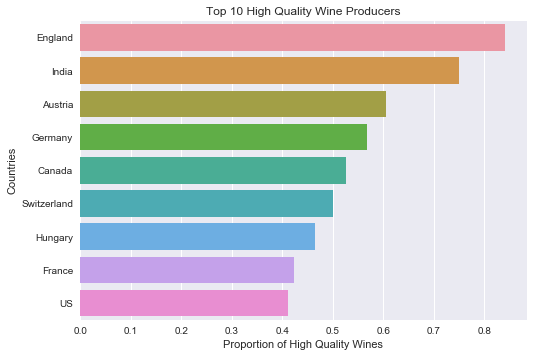

In [29]:
wine_count = wine_count.sort_values('Proportion of High Quality wines',ascending=False).iloc[:9,:]
sns.barplot(x='Proportion of High Quality wines',y='country',data=wine_count)
plt.xlabel('Proportion of High Quality Wines')
plt.ylabel('Countries')
plt.title('Top 10 High Quality Wine Producers')
plt.show()

The graph above shows the proportion of wines in the specific country that have scores above 90. By having a standardized metric for all countries, instead of using number of wines only, this is a fair measure to measure which countries produce a lot of really high quality wines. 

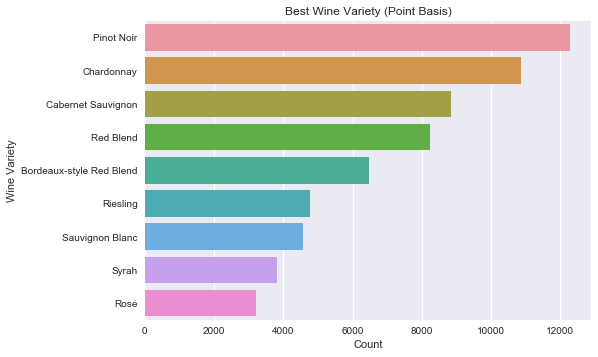

In [31]:
#Which wine variety have highest points? #based on count
variety_bestwine = df.groupby('variety').agg({'points':'count','price':'mean'}).reset_index()
variety_bestwine2 = variety_bestwine.sort_values('points',ascending=False).iloc[:9,:]
sns.barplot(x='points',y='variety',data=variety_bestwine2)
plt.xlabel('Count')
plt.ylabel('Wine Variety')
plt.title('Best Wine Variety (Point Basis)')
plt.show()

The wine variety with highest quality based on points is Pinot Noir, followed by: Chardonnay, Cabernet Sauvignon, Bordeaux-style Red Blend, etc.

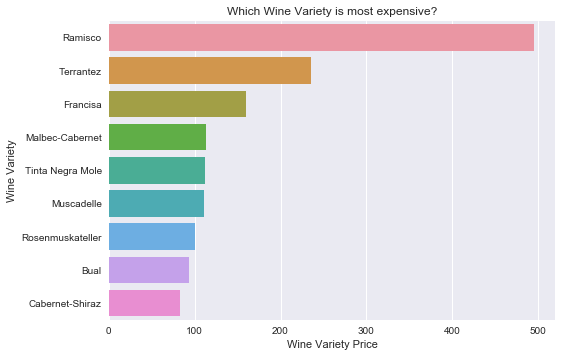

In [32]:
#Variety and Price
variety_price = variety_bestwine.sort_values('price',ascending=False).iloc[:9,:]
sns.barplot(x='price',y='variety',data=variety_price)
plt.xlabel('Wine Variety Price')
plt.ylabel('Wine Variety')
plt.title('Which Wine Variety is most expensive?')
plt.show()

This is very interesting because most of the wines that are considered really good based on points do not make it into the most expensive wines list. 

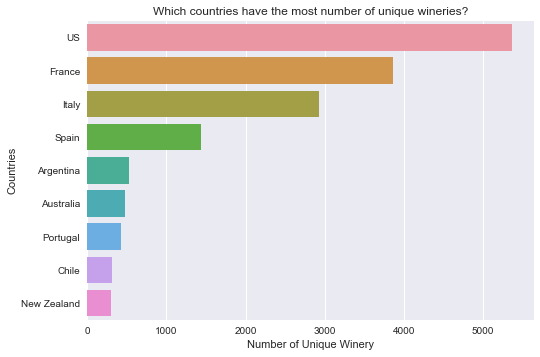

In [33]:
#Which countries have the most number of winery?
winery_count = df.groupby('country')['winery'].nunique().reset_index()
winery_count = winery_count.sort_values('winery',ascending=False).iloc[:9,:]
sns.barplot(x='winery',y='country',data=winery_count)
plt.xlabel('Number of Unique Winery')
plt.ylabel('Countries')
plt.title('Which countries have the most number of unique wineries?')
plt.show()

Turns out that US has the most number of unique wineries, followed by France, Italy, and Spain.

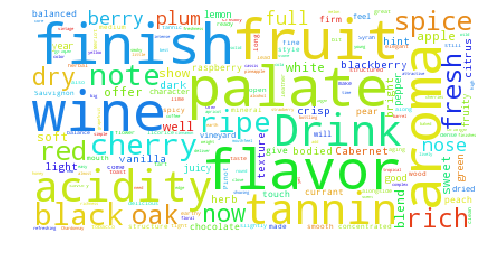

In [34]:
from wordcloud import WordCloud,STOPWORDS
wc = WordCloud(background_color='white', stopwords=STOPWORDS, max_font_size= 50)
wc.generate(' '.join(str(s) for s in df.description.values))
plt.axis('off')
plt.imshow(wc)
plt.show()

Turns out that the most frequent words that a sommelier use in describing wines they taste are: flavor, fruit, wine, acidity,palate, and aroma.

# Predicting wine variety using its description

In [35]:
df.head(2)

,Unnamed: 0,country,description,points,price,province,region_1,title,variety,winery,log_price
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",87,22.897212,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,3.131015
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.000000,Douro,unknown,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2.708050


In [197]:
description_wine = df[['description','variety']]
description_wine.head(2)

,description,variety
0,"Aromas include tropical fruit, broom, brimston...",White Blend
1,"This is ripe and fruity, a wine that is smooth...",Portuguese Red


In [198]:
#split training and testing data:
X = description_wine[['description']]
y = description_wine['variety']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [205]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
x_train_data = cv.fit_transform(x_train.description)
x_test_data = cv.transform(x_test.description)

In [241]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')
dummy_model = {}
wine_list = y.unique().tolist()
for wine in wine_list:
    dummy_mdl = dummy
    y_t = y_train == wine
    if y_t.sum() != 0:
        dummy_mdl.fit(x_train_data,y_t)
        dummy_model[wine] = dummy_mdl
    else: dummy_model[wine] = 0 

In [242]:
dummy_probs = pd.DataFrame(columns = wine_list)

In [243]:
for variety in wine_list:
    if dummy_model[variety]!= 0:
        dummy_probs[variety] = dummy_model[variety].predict_proba(x_test_data)[:,1]
    else: dummy_probs[variety] = np.zeros(x_test_data.shape[0])
    
wine_pred = dummy_probs.idxmax(axis=1)

pred_vs_actual_dummy = pd.DataFrame({'actual':y_test.values, 'predicted':predicted_wine.values})   

from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(pred_vs_actual_dummy.actual, pred_vs_actual_dummy.predicted))
pred_vs_actual_dummy.head(5)

Accuracy Score: 0.611729398524


,actual,predicted
0,Red Blend,Red Blend
1,Red Blend,Negroamaro
2,Chardonnay,Chardonnay
3,Chardonnay,Chardonnay
4,Pinot Noir,Pinot Noir


In [ ]:
####not all wines are in the list of wine

In [216]:
from sklearn.linear_model import LogisticRegression
logistic = {}
for wine in wine_list:
    model = LogisticRegression()
    y_t = y_train == wine
    if y_t.sum() != 0:
        model.fit(x_train_data,y_t)
        logistic[wine] = model
    else: logistic[wine] = 0 

In [218]:
testing_probs = pd.DataFrame(columns = wine_list)

In [219]:
testing_probs

,White Blend,Portuguese Red,Pinot Gris,Riesling,Pinot Noir,Tempranillo-Merlot,Frappato,Gewürztraminer,Cabernet Sauvignon,Nerello Mascalese,...,Viognier-Valdiguié,Trollinger,Tsapournakos,Francisa,Kuntra,Pignolo,Caprettone,Ondenc,Athiri,Bobal-Cabernet Sauvignon


In [224]:
#predict the probability for each wine variety using the x test data
#get the highest probability of wine variety and make it the pr
for variety in wine_list:
    if logistic[variety]!= 0:
        testing_probs[variety] = logistic[variety].predict_proba(x_test_data)[:,1]
    else: testing_probs[variety] = np.zeros(x_test_data.shape[0])
    
predicted_wine = testing_probs.idxmax(axis=1)

comparison = pd.DataFrame({'actual':y_test.values, 'predicted':predicted_wine.values})   

from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(comparison.actual, comparison.predicted))
comparison.head(5)

Accuracy Score: 0.611729398524


,actual,predicted
0,Red Blend,Red Blend
1,Red Blend,Negroamaro
2,Chardonnay,Chardonnay
3,Chardonnay,Chardonnay
4,Pinot Noir,Pinot Noir
